### Import configuration and data.

In [17]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'pr-Upwind_sp-random_va-False_ph-False_ba-False_pa-500_ep-2000_lr-003_we-002_ba-1024_n-200_se-True'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cpu device
Dataset size: 404 102


### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}


### Training

Epoch: 1/2000, Train loss: 31.0423
Epoch: 100/2000, Train loss: 0.3315
Epoch: 200/2000, Train loss: 0.2762
Epoch: 300/2000, Train loss: 0.2446
Epoch: 400/2000, Train loss: 0.2506
Epoch: 500/2000, Train loss: 0.2440
Epoch: 600/2000, Train loss: 0.2408
Epoch: 700/2000, Train loss: 0.2446
Epoch: 800/2000, Train loss: 0.2152
Epoch: 900/2000, Train loss: 0.2078
Epoch: 1000/2000, Train loss: 0.2071
Epoch: 1100/2000, Train loss: 0.1943
Epoch: 1200/2000, Train loss: 0.1924
Epoch: 1300/2000, Train loss: 0.1882
Epoch: 1400/2000, Train loss: 0.1870
Epoch: 1500/2000, Train loss: 0.1785
Epoch: 1600/2000, Train loss: 0.1711
Epoch: 1700/2000, Train loss: 0.1623
Epoch: 1800/2000, Train loss: 0.1624
Epoch: 1900/2000, Train loss: 0.2033
Epoch: 2000/2000, Train loss: 0.1750
Minimum loss: 0.17498889565467834


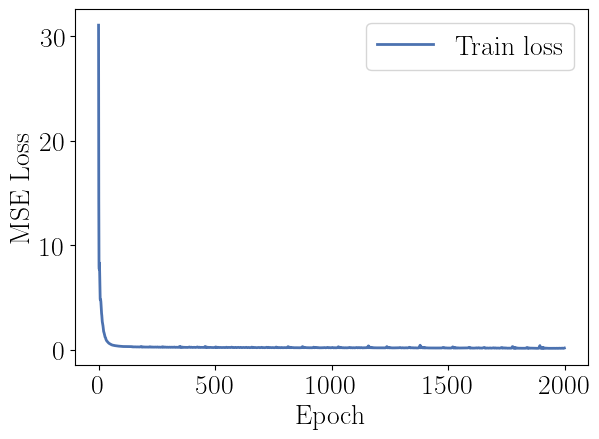

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train MSE Loss: 0.1746, R2: 0.9248
Test MSE Loss: 0.4176, R2: 0.7781


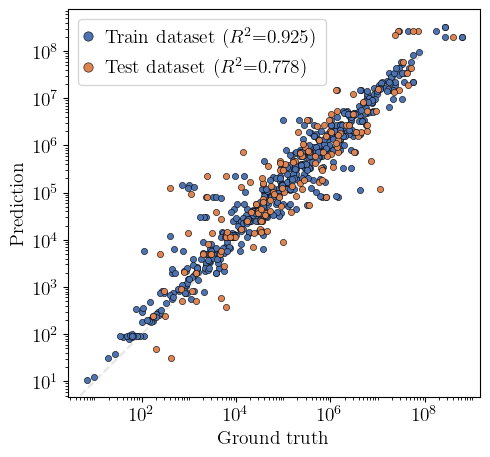

In [4]:
trainer.plot_truth_pred()

Train MSE Loss: 0.0934, R2: 0.9598
Test MSE Loss: 0.3616, R2: 0.8079


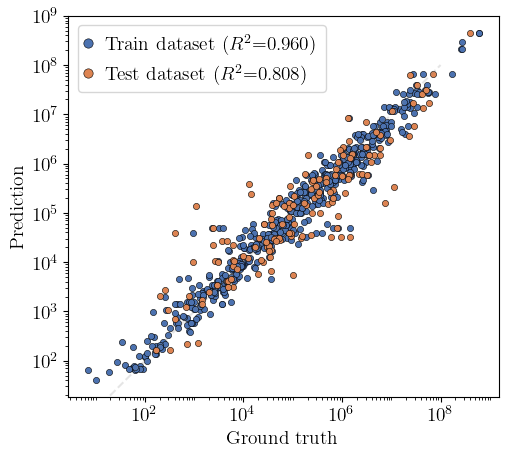

In [5]:
trainer.plot_truth_pred_sklearn(model_name='rf')

### Permutation feature importance

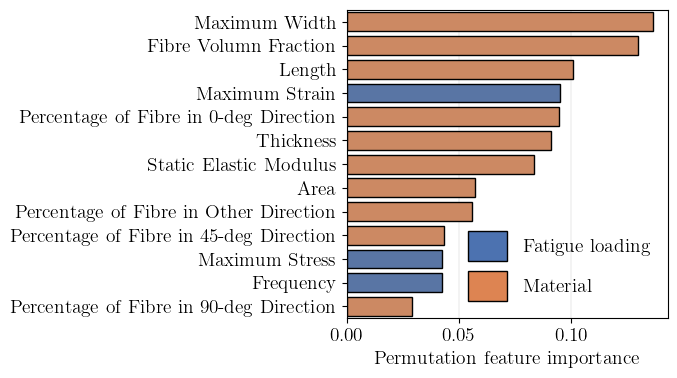

In [7]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Thickness
Calculate PDP:  Maximum Width
Calculate PDP:  Area
Calculate PDP:  Length
Calculate PDP:  Maximum Strain
Calculate PDP:  Maximum Stress
Calculate PDP:  Frequency
Calculate PDP:  Static Elastic Modulus


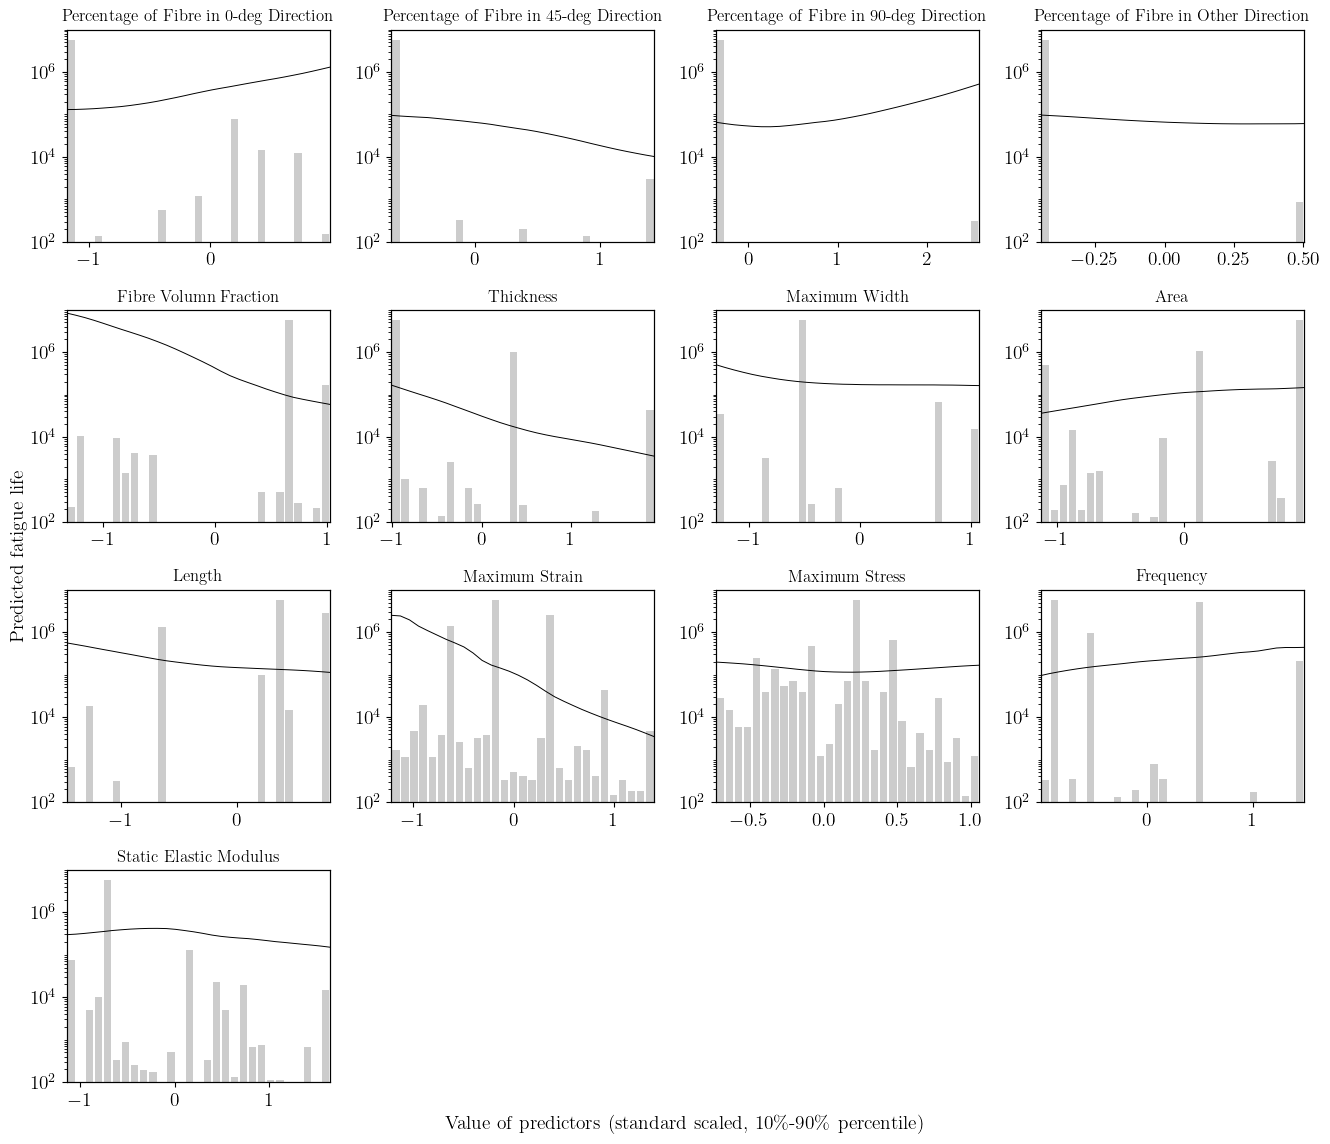

In [8]:
trainer.plot_partial_dependence()

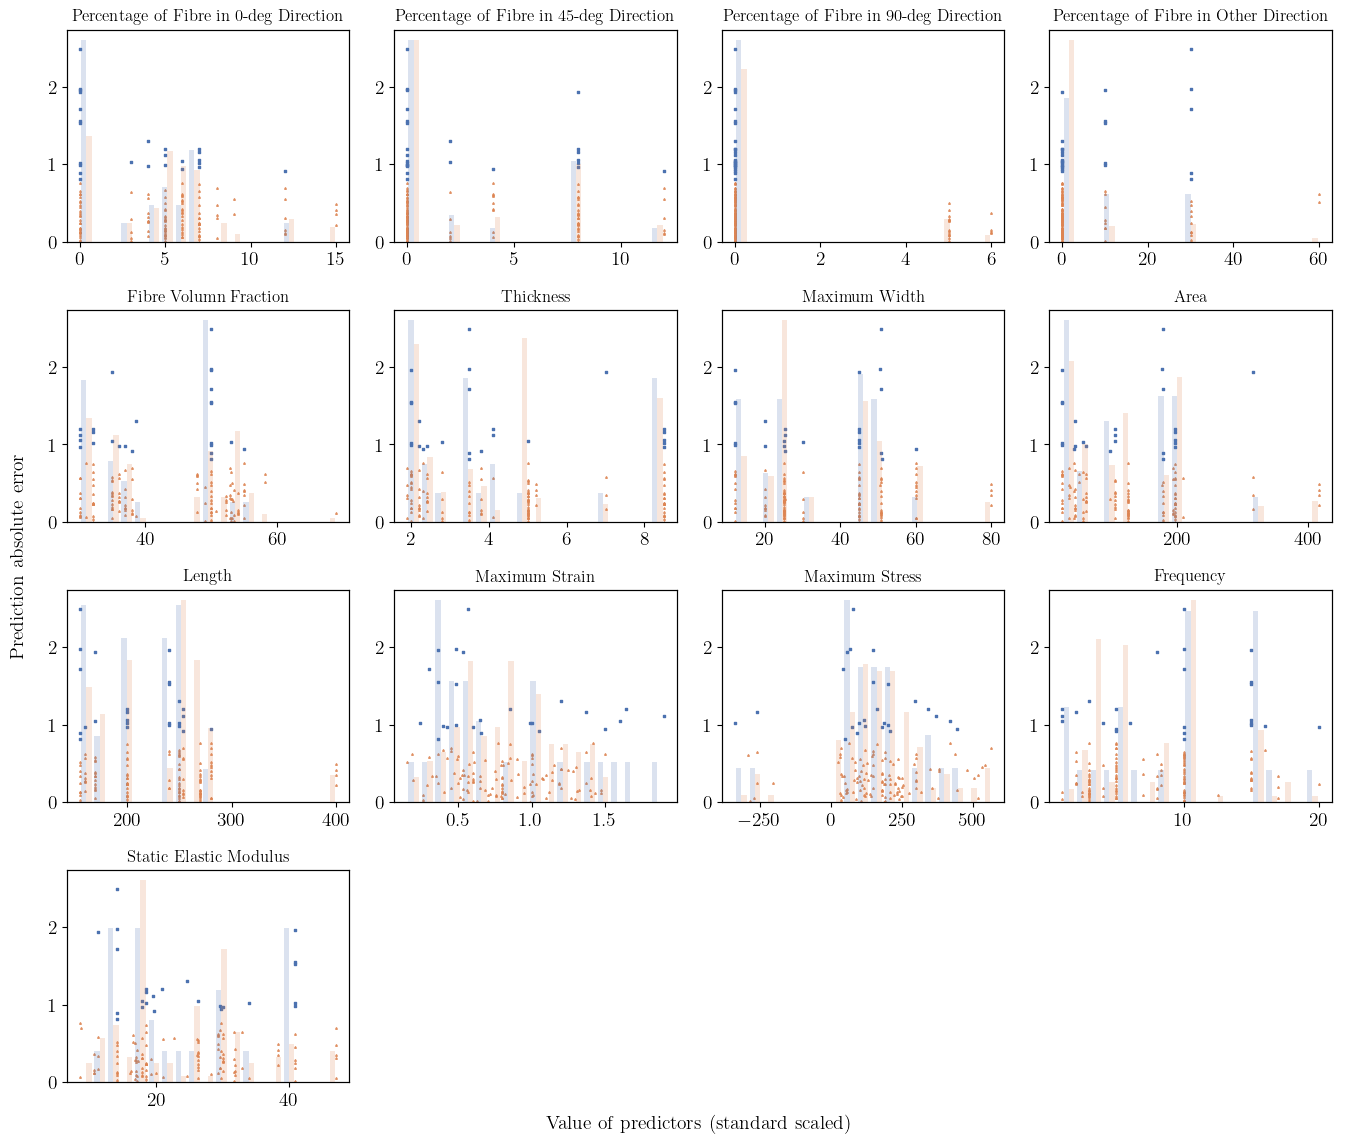

In [9]:
trainer.plot_partial_err()